# Classification models spot-check on Telecom users dataset to predict churn of a user.

## *Using all features*

In this notebook we perform an Classification models spot-check on Telecom users dataset (obtained from kaggle: https://www.kaggle.com/radmirzosimov/telecom-users-dataset) to predict churn of a user.

-------------------------------------------------------------------------------------------------------------------------------------------------------------

## 0. Import libraries

In [46]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt

from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier

print("Libraries imported!!")

Libraries imported!!


----------------------------------------------------------------------------------------
## 1. Load and read the dataset

Here, we read the dataset and we find the shape of it as well as the colum names.

In [2]:
df = pd.read_csv('telecom_users_train.csv')
#conversions
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') 
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

# drop first column
df = df.drop(['Unnamed: 0','customerID','TotalCharges'], axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,1,Yes,No,28,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,25.70,No
1,Female,0,No,No,6,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,47.95,Yes
2,Male,0,No,No,55,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.80,Yes
3,Female,0,Yes,Yes,54,Yes,Yes,DSL,No,Yes,Yes,No,No,No,Two year,Yes,Bank transfer (automatic),59.80,No
4,Female,0,No,No,29,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,Male,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.40,No
4784,Male,0,Yes,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,20.35,No
4785,Male,0,No,No,5,Yes,No,DSL,No,No,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),63.95,No
4786,Female,0,Yes,Yes,43,Yes,No,DSL,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),75.20,No


## 2. Evaluate models without pre-processing
- Label encoding categorical attributes

In [3]:
#pre-process data
data_train = df.copy()
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

for f in cat_features :
    data_train[f] = LabelEncoder().fit_transform(data_train[f])
data_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,1,0,28,1,2,2,1,1,1,1,1,1,0,0,3,25.70,No
1,0,0,0,0,6,0,1,0,0,0,2,0,2,2,0,1,2,47.95,Yes
2,1,0,0,0,55,1,2,1,0,0,0,0,2,2,0,1,2,96.80,Yes
3,0,0,1,1,54,1,2,0,0,2,2,0,0,0,2,1,0,59.80,No
4,0,0,0,0,29,1,0,2,1,1,1,1,1,1,0,0,1,19.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,1,0,1,0,72,1,2,2,1,1,1,1,1,1,2,0,3,25.40,No
4784,1,0,1,1,66,1,0,2,1,1,1,1,1,1,1,1,2,20.35,No
4785,1,0,0,0,5,1,0,0,0,0,2,2,2,0,0,1,1,63.95,No
4786,0,0,1,1,43,1,0,0,2,0,2,0,2,2,2,0,0,75.20,No


In [4]:
target = 'Churn'
X_train = data_train.loc[:,data_train.columns != target].values
y_train = data_train[target].values
X_train.shape, y_train.shape

((4788, 18), (4788,))

In [5]:
#test options and evaluation metric
num_folds = 10
seed = 64
scoring = 'accuracy'

In [7]:
#spot-check the models
models = dict()
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()
models['AB'] = AdaBoostClassifier()
models['GBM'] = GradientBoostingClassifier()
models['RF'] = RandomForestClassifier()
models['ET'] = ExtraTreesClassifier()

mean_accuracies = dict()

#evaluate each model in turn
results = []
names = []
for name, model in models.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    mean_accuracies[name] = cv_results.mean()
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

LR: nan (+-nan)
LDA: 0.798031 (+-0.018153)
KNN: 0.774225 (+-0.014153)
CART: 0.724511 (+-0.026204)
NB: 0.755011 (+-0.021290)
SVM: 0.786962 (+-0.017026)
AB: 0.796568 (+-0.020329)
GBM: 0.796361 (+-0.014915)
RF: 0.786343 (+-0.018202)
ET: 0.768383 (+-0.016960)


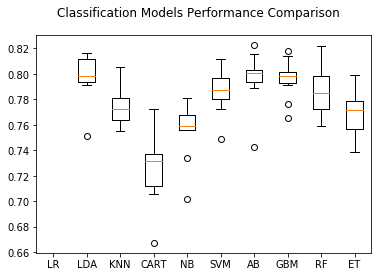

In [8]:
#compare models
fig = plt.figure()
fig.suptitle('Classification Models Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [13]:
best_acc = Counter(mean_accuracies)
print("The 3 best models with Label Encoding are:")
for name, accuracy in best_acc.most_common(4) :
    print('-', name, ':', accuracy)

The 3 best models with Label Encoding are:
- LDA : 0.7980306775796857
- AB : 0.7965675526943337
- GBM : 0.7963605314418987
- LR : nan


## 3. Evaluate models One-Hot encoding
- One-Hot encoding categorical attributes

In [14]:
#pre-process data
data_train = df.copy()
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']
num_features = ['tenure','MonthlyCharges']

for f in cat_features :
    data_train[f] = LabelEncoder().fit_transform(data_train[f])
data_train

target = 'Churn'
X_train = data_train.loc[:,data_train.columns != target].values
y_train = data_train[target].values
X_train.shape, y_train.shape

((4788, 18), (4788,))

In [15]:
encoded = OneHotEncoder().fit_transform(data_train[cat_features]).toarray()
X_train = np.column_stack((encoded, data_train[num_features].values))
X_train.shape

(4788, 45)

In [16]:
#test options and evaluation metric
num_folds = 10
seed = 64
scoring = 'accuracy'

In [17]:
#spot-check the models
models = dict()
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()
models['AB'] = AdaBoostClassifier()
models['GBM'] = GradientBoostingClassifier()
models['RF'] = RandomForestClassifier()
models['ET'] = ExtraTreesClassifier()

mean_accuracies = dict()

#evaluate each model in turn
results = []
names = []
for name, model in models.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    mean_accuracies[name] = cv_results.mean()
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

LR: nan (+-nan)
LDA: 0.798032 (+-0.016543)
KNN: 0.769210 (+-0.018813)
CART: 0.730996 (+-0.025954)
NB: 0.697776 (+-0.026559)
SVM: 0.787589 (+-0.015683)
AB: 0.798447 (+-0.019429)
GBM: 0.798451 (+-0.015991)
RF: 0.784462 (+-0.015844)
ET: 0.758146 (+-0.011193)


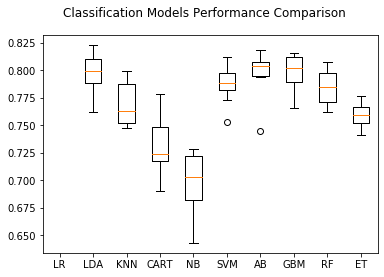

In [18]:
#compare models
fig = plt.figure()
fig.suptitle('Classification Models Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [19]:
best_acc = Counter(mean_accuracies)
print("The 3 best models with OneHot encoding are:")
for name, accuracy in best_acc.most_common(4) :
    print('-', name, ':', accuracy)

The 3 best models with OneHot encoding are:
- LR : nan
- GBM : 0.7984512713900124
- AB : 0.7984473406067383
- LDA : 0.7980319878407771


The models improved with One-Hot encoding.

## 4. Evaluate the models Label Encoding and Standardizing the data
- Label encoding + Standardization

In [20]:
#pre-process data
data_train = df.copy()
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

for f in cat_features :
    data_train[f] = LabelEncoder().fit_transform(data_train[f])
data_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,1,0,28,1,2,2,1,1,1,1,1,1,0,0,3,25.70,No
1,0,0,0,0,6,0,1,0,0,0,2,0,2,2,0,1,2,47.95,Yes
2,1,0,0,0,55,1,2,1,0,0,0,0,2,2,0,1,2,96.80,Yes
3,0,0,1,1,54,1,2,0,0,2,2,0,0,0,2,1,0,59.80,No
4,0,0,0,0,29,1,0,2,1,1,1,1,1,1,0,0,1,19.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,1,0,1,0,72,1,2,2,1,1,1,1,1,1,2,0,3,25.40,No
4784,1,0,1,1,66,1,0,2,1,1,1,1,1,1,1,1,2,20.35,No
4785,1,0,0,0,5,1,0,0,0,0,2,2,2,0,0,1,1,63.95,No
4786,0,0,1,1,43,1,0,0,2,0,2,0,2,2,2,0,0,75.20,No


In [21]:
target = 'Churn'
X_train = data_train.loc[:,data_train.columns != target].values
y_train = data_train[target].values
X_train.shape, y_train.shape

((4788, 18), (4788,))

In [22]:
#test options and evaluation metric
num_folds = 10
seed = 64
scoring = 'accuracy'

In [25]:
#evaluate models
pipelines = dict()
pipelines['ScaledLR'] = Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])
pipelines['ScaledLDA'] = Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])
pipelines['ScaledKNN'] = Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])
pipelines['ScaledCART'] = Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])
pipelines['ScaledNB'] = Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])
pipelines['ScaledSVM'] = Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])
pipelines['ScaledAB'] = Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])
pipelines['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])
pipelines['ScaledRF'] = Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])
pipelines['ScaledET'] = Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])

mean_accuracies = dict()

#evaluate each model in turn
results = []
names = []
for name, model in pipelines.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    mean_accuracies[name] = cv_results.mean()
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.797195 (+-0.015800)
ScaledLDA: 0.798031 (+-0.018153)
ScaledKNN: 0.746651 (+-0.027347)
ScaledCART: 0.726809 (+-0.026300)
ScaledNB: 0.755011 (+-0.021290)
ScaledSVM: 0.789258 (+-0.021791)
ScaledAB: 0.796568 (+-0.020329)
ScaledGBM: 0.796569 (+-0.015002)
ScaledRF: 0.780077 (+-0.016717)
ScaledET: 0.768589 (+-0.016356)


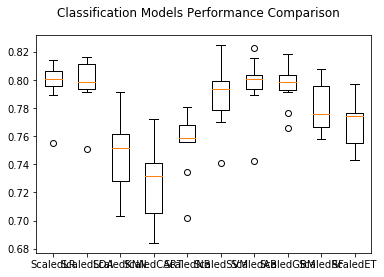

In [26]:
#compare models
fig = plt.figure()
fig.suptitle('Classification Models Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [28]:
best_acc = Counter(mean_accuracies)
print("The 3 best models with LabelEncoding + Standardization are:")
for name, accuracy in best_acc.most_common(3) :
    print('-', name, ':', accuracy)

The 3 best models with LabelEncoding + Standardization are:
- ScaledLDA : 0.7980306775796857
- ScaledLR : 0.797194731003398
- ScaledGBM : 0.796569299709122


The models didn't improved with label encoding and standardization. Let's see what happends with One-Hot encoding and Standardization.

## 5. Evaluate the models One-Hot Encoding and Standardizing the data
- One-Hot encoding + Standardization

In [29]:
#pre-process data
data_train = df.copy()
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

for f in cat_features :
    data_train[f] = LabelEncoder().fit_transform(data_train[f])
data_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,1,0,28,1,2,2,1,1,1,1,1,1,0,0,3,25.70,No
1,0,0,0,0,6,0,1,0,0,0,2,0,2,2,0,1,2,47.95,Yes
2,1,0,0,0,55,1,2,1,0,0,0,0,2,2,0,1,2,96.80,Yes
3,0,0,1,1,54,1,2,0,0,2,2,0,0,0,2,1,0,59.80,No
4,0,0,0,0,29,1,0,2,1,1,1,1,1,1,0,0,1,19.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,1,0,1,0,72,1,2,2,1,1,1,1,1,1,2,0,3,25.40,No
4784,1,0,1,1,66,1,0,2,1,1,1,1,1,1,1,1,2,20.35,No
4785,1,0,0,0,5,1,0,0,0,0,2,2,2,0,0,1,1,63.95,No
4786,0,0,1,1,43,1,0,0,2,0,2,0,2,2,2,0,0,75.20,No


In [30]:
target = 'Churn'
encoded = OneHotEncoder().fit_transform(data_train[cat_features]).toarray()
X_train = np.column_stack((encoded, data_train[num_features].values))
y_train = data_train[target].values
X_train.shape, y_train.shape

((4788, 45), (4788,))

In [31]:
#test options and evaluation metric
num_folds = 10
seed = 64
scoring = 'accuracy'

In [32]:
#evaluate models
pipelines = dict()
pipelines['ScaledLR'] = Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])
pipelines['ScaledLDA'] = Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])
pipelines['ScaledKNN'] = Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])
pipelines['ScaledCART'] = Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])
pipelines['ScaledNB'] = Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])
pipelines['ScaledSVM'] = Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])
pipelines['ScaledAB'] = Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])
pipelines['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])
pipelines['ScaledRF'] = Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])
pipelines['ScaledET'] = Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])

mean_accuracies = dict()

#evaluate each model in turn
results = []
names = []
for name, model in pipelines.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    mean_accuracies[name] = cv_results.mean()
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.798239 (+-0.017616)
ScaledLDA: 0.798032 (+-0.016543)
ScaledKNN: 0.761277 (+-0.019425)
ScaledCART: 0.722436 (+-0.023712)
ScaledNB: 0.697776 (+-0.026559)
ScaledSVM: 0.791143 (+-0.015745)
ScaledAB: 0.798447 (+-0.019429)
ScaledGBM: 0.798869 (+-0.016096)
ScaledRF: 0.782165 (+-0.016284)
ScaledET: 0.756059 (+-0.017970)


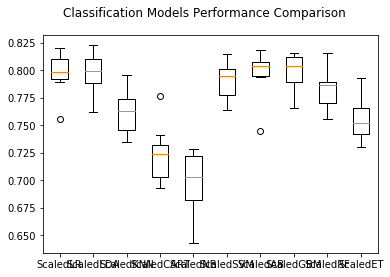

In [33]:
#compare models
fig = plt.figure()
fig.suptitle('Classification Models Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [34]:
best_acc = Counter(mean_accuracies)
print("The 3 best models with LabelEncoding + Standardization are:")
for name, accuracy in best_acc.most_common(3) :
    print('-', name, ':', accuracy)

The 3 best models with LabelEncoding + Standardization are:
- ScaledGBM : 0.7988688079244591
- ScaledAB : 0.7984473406067383
- ScaledLR : 0.7982394458469091


The models improved with OneHot encoding and Standardization. The best accuracy obtained from the moment is of 0.7988 with GBM (OneHot + Standardization).

Let's see what happend with normalization.

## 6. Evaluate the models Label Encoding and Normalizing the data
- Label encoding + Normalization

In [54]:
#pre-process data
data_train = df.copy()
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

for f in cat_features :
    data_train[f] = LabelEncoder().fit_transform(data_train[f])
data_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,1,0,28,1,2,2,1,1,1,1,1,1,0,0,3,25.70,No
1,0,0,0,0,6,0,1,0,0,0,2,0,2,2,0,1,2,47.95,Yes
2,1,0,0,0,55,1,2,1,0,0,0,0,2,2,0,1,2,96.80,Yes
3,0,0,1,1,54,1,2,0,0,2,2,0,0,0,2,1,0,59.80,No
4,0,0,0,0,29,1,0,2,1,1,1,1,1,1,0,0,1,19.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,1,0,1,0,72,1,2,2,1,1,1,1,1,1,2,0,3,25.40,No
4784,1,0,1,1,66,1,0,2,1,1,1,1,1,1,1,1,2,20.35,No
4785,1,0,0,0,5,1,0,0,0,0,2,2,2,0,0,1,1,63.95,No
4786,0,0,1,1,43,1,0,0,2,0,2,0,2,2,2,0,0,75.20,No


In [55]:
target = 'Churn'
X_train = data_train.loc[:,data_train.columns != target].values
y_train = data_train[target].values
X_train.shape, y_train.shape

((4788, 18), (4788,))

In [56]:
#test options and evaluation metric
num_folds = 10
seed = 64
scoring = 'accuracy'

In [57]:
#evaluate models
pipelines = dict()
pipelines['ScaledLR'] = Pipeline([('Scaler', MinMaxScaler()),('LR', LogisticRegression())])
pipelines['ScaledLDA'] = Pipeline([('Scaler', MinMaxScaler()),('LDA', LinearDiscriminantAnalysis())])
pipelines['ScaledKNN'] = Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsClassifier())])
pipelines['ScaledCART'] = Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeClassifier())])
pipelines['ScaledNB'] = Pipeline([('Scaler', MinMaxScaler()),('NB', GaussianNB())])
pipelines['ScaledSVM'] = Pipeline([('Scaler', MinMaxScaler()),('SVM', SVC())])
pipelines['ScaledAB'] = Pipeline([('Scaler', MinMaxScaler()),('AB', AdaBoostClassifier())])
pipelines['ScaledGBM'] = Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingClassifier())])
pipelines['ScaledRF'] = Pipeline([('Scaler', MinMaxScaler()),('RF', RandomForestClassifier())])
pipelines['ScaledET'] = Pipeline([('Scaler', MinMaxScaler()),('ET', ExtraTreesClassifier())])

mean_accuracies = dict()

#evaluate each model in turn
results = []
names = []
for name, model in pipelines.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    mean_accuracies[name] = cv_results.mean()
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.796986 (+-0.016543)
ScaledLDA: 0.798031 (+-0.018153)
ScaledKNN: 0.749160 (+-0.022912)
ScaledCART: 0.727435 (+-0.027283)
ScaledNB: 0.755011 (+-0.021290)
ScaledSVM: 0.789260 (+-0.017855)
ScaledAB: 0.796568 (+-0.020329)
ScaledGBM: 0.796569 (+-0.014649)
ScaledRF: 0.785714 (+-0.015220)
ScaledET: 0.766503 (+-0.021165)


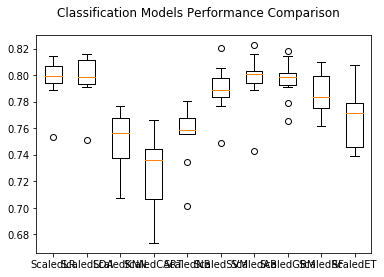

In [58]:
#compare models
fig = plt.figure()
fig.suptitle('Classification Models Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [59]:
best_acc = Counter(mean_accuracies)
print("The 3 best models with LabelEncoding + Standardization are:")
for name, accuracy in best_acc.most_common(3) :
    print('-', name, ':', accuracy)

The 3 best models with LabelEncoding + Standardization are:
- ScaledLDA : 0.7980306775796857
- ScaledLR : 0.7969855259824775
- ScaledGBM : 0.796569299709122


The models performance has not improved.

## 7. Evaluate the models One-Hot encoding and Normalizing the data
- One-Hot encoding + Normalization

In [60]:
#pre-process data
data_train = df.copy()
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

for f in cat_features :
    data_train[f] = LabelEncoder().fit_transform(data_train[f])
data_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,1,0,28,1,2,2,1,1,1,1,1,1,0,0,3,25.70,No
1,0,0,0,0,6,0,1,0,0,0,2,0,2,2,0,1,2,47.95,Yes
2,1,0,0,0,55,1,2,1,0,0,0,0,2,2,0,1,2,96.80,Yes
3,0,0,1,1,54,1,2,0,0,2,2,0,0,0,2,1,0,59.80,No
4,0,0,0,0,29,1,0,2,1,1,1,1,1,1,0,0,1,19.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,1,0,1,0,72,1,2,2,1,1,1,1,1,1,2,0,3,25.40,No
4784,1,0,1,1,66,1,0,2,1,1,1,1,1,1,1,1,2,20.35,No
4785,1,0,0,0,5,1,0,0,0,0,2,2,2,0,0,1,1,63.95,No
4786,0,0,1,1,43,1,0,0,2,0,2,0,2,2,2,0,0,75.20,No


In [61]:
target = 'Churn'
encoded = OneHotEncoder().fit_transform(data_train[cat_features]).toarray()
X_train = np.column_stack((encoded, data_train[num_features].values))
y_train = data_train[target].values
X_train.shape, y_train.shape

((4788, 45), (4788,))

In [62]:
#test options and evaluation metric
num_folds = 10
seed = 64
scoring = 'accuracy'

In [63]:
#evaluate models
pipelines = dict()
pipelines['ScaledLR'] = Pipeline([('Scaler', MinMaxScaler()),('LR', LogisticRegression())])
pipelines['ScaledLDA'] = Pipeline([('Scaler', MinMaxScaler()),('LDA', LinearDiscriminantAnalysis())])
pipelines['ScaledKNN'] = Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsClassifier())])
pipelines['ScaledCART'] = Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeClassifier())])
pipelines['ScaledNB'] = Pipeline([('Scaler', MinMaxScaler()),('NB', GaussianNB())])
pipelines['ScaledSVM'] = Pipeline([('Scaler', MinMaxScaler()),('SVM', SVC())])
pipelines['ScaledAB'] = Pipeline([('Scaler', MinMaxScaler()),('AB', AdaBoostClassifier())])
pipelines['ScaledGBM'] = Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingClassifier())])
pipelines['ScaledRF'] = Pipeline([('Scaler', MinMaxScaler()),('RF', RandomForestClassifier())])
pipelines['ScaledET'] = Pipeline([('Scaler', MinMaxScaler()),('ET', ExtraTreesClassifier())])

mean_accuracies = dict()

#evaluate each model in turn
results = []
names = []
for name, model in pipelines.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    mean_accuracies[name] = cv_results.mean()
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.797196 (+-0.017567)
ScaledLDA: 0.798032 (+-0.016543)
ScaledKNN: 0.755012 (+-0.021408)
ScaledCART: 0.729742 (+-0.020537)
ScaledNB: 0.697776 (+-0.026559)
ScaledSVM: 0.787800 (+-0.013907)
ScaledAB: 0.798447 (+-0.019429)
ScaledGBM: 0.798660 (+-0.016018)
ScaledRF: 0.777990 (+-0.016571)
ScaledET: 0.755224 (+-0.016910)


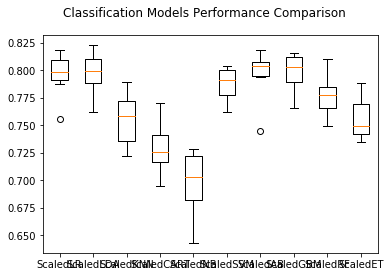

In [64]:
#compare models
fig = plt.figure()
fig.suptitle('Classification Models Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [65]:
best_acc = Counter(mean_accuracies)
print("The 3 best models with LabelEncoding + Standardization are:")
for name, accuracy in best_acc.most_common(3) :
    print('-', name, ':', accuracy)

The 3 best models with LabelEncoding + Standardization are:
- ScaledGBM : 0.7986600396572358
- ScaledAB : 0.7984473406067383
- ScaledLDA : 0.7980319878407771


## Conclusion
The best accuracy result has been obtained One-Hot encoding and Standardizing the data and using GBM (accuray mean value of 0.7988).